# Introduction about dataset

<p><b>Intracranial hemorrhage🧠 (ICH)</b> is caused by bleeding within the brain tissue itself — a life-threatening type of stroke. A stroke occurs when the brain is deprived of oxygen and blood supply. ICH is most commonly caused by hypertension, arteriovenous malformations, or head trauma. Treatment focuses on stopping the bleeding, removing the blood clot (hematoma), and relieving the pressure on the brain.</p>
<br/><br/>
<p><b>Diagnosis</b> requires an urgent procedure. When a patient shows acute neurological symptoms such as severe headache or loss of consciousness, highly trained specialists review medical images of the patient’s cranium to look for the presence, location and type of hemorrhage. The process is complicated and often time consuming.</p>
<br/><br/>
<p>The current clinical protocol to diagnose Intracranial hemorrhage🧠 ICH is examining Computerized Tomography (CT) scans by radiologists to detect ICH and localize its regions. However, this process relies heavily on the availability of an experienced radiologist.CT images are examined by an expert radiologist to determine whether ICH has occurred and if so, detect its type and region. However, this diagnosis process relies on the availability of a subspecialty-trained neuroradiologist, and as a result, could be time inefficient and even inaccurate, especially in remote areas where specialized care is scarce.</p>
<br/><br/>
<p>In Recent years ,the Advancement in <b>Deep learning</b> has enable us to solve various problem, even in some cases it shows us better results than humans.we will try to solve Intracranical hemorrhage detection and segmentation using CT scan dataset of brain which is annoted by expert radiologists. </p>
<p>The challenge is to build an algorithm to detect acute intracranial hemorrhage and its subtypes.</p>


>Intraparenchymal hemorrhage is blood that is located completely within the brain itself; intraventricular or subarachnoid hemorrhage is blood that has leaked into the spaces of the brain that normally contain cerebrospinal fluid (the ventricles or subarachnoid cisterns). Extra-axial hemorrhages are blood that collects in the tissue coverings that surround the brain (e.g. subdural or epidural subtypes). ee figure.) Patients may exhibit more than one type of cerebral hemorrhage, which c may appear on the same image. While small hemorrhages are less morbid than large hemorrhages typically, even a small hemorrhage can lead to death because it is an indicator of another type of serious abnormality (e.g. cerebral aneurysm).
>
> #### There are four types of ICH:
>    * **Intraparenchymal hemorrhage**
>    * **Epidural hemorrhage**
>    * **Subdural hemorrhage**
>    * **Subarachnoid hemorrhage**
>    * **intraventricular hemorrhage**
>
> one patient can exibits more than one type of hemorrhage

![file](https://user-images.githubusercontent.com/58046531/89164136-4eac1d00-d594-11ea-9408-6d271518b3a7.png)


This datset have six classes 
1. any - any of five class of hemorrhage is present or not in patient
2. epidural
3. intraparenchymal
4. intraventricular 
5. subarachnoid
6. subdural

It is possible that one patient have more than type of hemorrhage.

In [1]:
base_url = '~/kaggle/rsna-intracranial-hemorrhage-detection/'

In [2]:
TRAIN_DIR = '/home/ubuntu/kaggle/rsna-intracranial-hemorrhage-detection/stage_2_train'
TEST_DIR = '/home/ubuntu/kaggle/rsna-intracranial-hemorrhage-detection/stage_2_test'

In [58]:
import os
import pandas as pd
import swifter
import numpy as np
from tqdm import *
import re
import seaborn as sns
import pydicom
import joblib

In [4]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [5]:
! ls {TRAIN_DIR} | wc -l


752803


In [6]:
! ls {TEST_DIR} | wc -l

121232


In [7]:
! ls {TRAIN_DIR} | head -n 5

ID_000012eaf.dcm
ID_000039fa0.dcm
ID_00005679d.dcm
ID_00008ce3c.dcm
ID_0000950d7.dcm
ls: write error: Broken pipe


In [24]:
train_df = pd.read_csv(base_url+'stage_2_train.csv')
print(train_df.shape)
train_df.head(10)

(4516842, 2)


,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0
5,ID_12cadc6af_any,0
6,ID_38fd7baa0_epidural,0
7,ID_38fd7baa0_intraparenchymal,0
8,ID_38fd7baa0_intraventricular,0
9,ID_38fd7baa0_subarachnoid,0


In [25]:
train_df[['ID', 'Subtype']] = train_df['ID'].str.rsplit(pat='_', n=1, expand=True)
print(train_df.shape)


(4516842, 3)


Here if we look then we find that each image have output for each class as True(1) or False(0) mean single image have six duplicate image.so we will convert them into one_hot_encoder and then single image will have single row.

In [26]:
train_df.tail(6)

,ID,Label,Subtype
4516836,ID_4a85a3a3f,0,epidural
4516837,ID_4a85a3a3f,0,intraparenchymal
4516838,ID_4a85a3a3f,0,intraventricular
4516839,ID_4a85a3a3f,0,subarachnoid
4516840,ID_4a85a3a3f,0,subdural
4516841,ID_4a85a3a3f,0,any


In [27]:
def fix_id(img_id, img_dir=TRAIN_DIR):
    if not re.match(r'ID_[a-z0-9]+', img_id):
        sop = re.search(r'[a-z0-9]+', img_id)
        if sop:
            img_id_new = f'ID_{sop[0]}'
            return img_id_new
        else:
            print(img_id)
    return img_id

In [28]:
train_df['ID'].apply(fix_id)

0          ID_12cadc6af
1          ID_12cadc6af
2          ID_12cadc6af
3          ID_12cadc6af
4          ID_12cadc6af
               ...     
4516837    ID_4a85a3a3f
4516838    ID_4a85a3a3f
4516839    ID_4a85a3a3f
4516840    ID_4a85a3a3f
4516841    ID_4a85a3a3f
Name: ID, Length: 4516842, dtype: object

In [29]:
train_new = train_df.pivot_table(index='ID', columns='Subtype').reset_index()
print(train_new.shape)
train_new.head()

(752803, 7)


ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
0        ID_000012eaf     0        0                0                0   
1        ID_000039fa0     0        0                0                0   
2        ID_00005679d     0        0                0                0   
3        ID_00008ce3c     0        0                0                0   
4        ID_0000950d7     0        0                0                0   

                               
Subtype subarachnoid subdural  
0                  0        0  
1                  0        0  
2                  0        0  
3                  0        0  
4                  0        0

In [30]:
subtype_ct = train_new['Label'].sum(axis=0)
print(subtype_ct)

Subtype
any                 107933
epidural              3145
intraparenchymal     36118
intraventricular     26205
subarachnoid         35675
subdural             47166
dtype: int64


## Distribution of each type of Hemorrhage

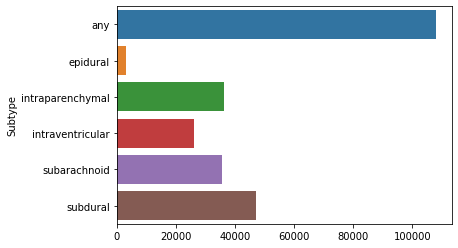

In [15]:
sns.barplot(x=subtype_ct.values, y=subtype_ct.index);

In [31]:
def id_to_filepath(img_id, img_dir=TRAIN_DIR):
    filepath = f'{img_dir}/{img_id}.dcm' # pydicom doesn't play nice with Path objects
    if os.path.exists(filepath):
        return filepath
    else:
        return 'DNE'

In [32]:
train_new['filepath'] = train_new['ID'].apply(id_to_filepath)
train_new.head()

ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
0        ID_000012eaf     0        0                0                0   
1        ID_000039fa0     0        0                0                0   
2        ID_00005679d     0        0                0                0   
3        ID_00008ce3c     0        0                0                0   
4        ID_0000950d7     0        0                0                0   

                               \
Subtype subarachnoid subdural   
0                  0        0   
1                  0        0   
2                  0        0   
3                  0        0   
4                  0        0   

                                                  filepath  
Subtype                                                     
0        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
1        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
2        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
3        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  
4        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...

In [74]:
def get_patient_data(filepath):
    if filepath != 'DNE':
        dcm_data = pydicom.dcmread(filepath, stop_before_pixels=True)
        return dcm_data.PatientID, dcm_data.StudyInstanceUID, dcm_data.SeriesInstanceUID

In [75]:
tqdm.pandas()
train_new['PatientID'], train_new['StudyID'], train_new['SeriesID'] = zip(*train_new['filepath'].progress_apply(get_patient_data))

100%|██████████| 752803/752803 [17:31<00:00, 716.03it/s] 


In [76]:
train_new.head(10)

ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
0        ID_000012eaf     0        0                0                0   
1        ID_000039fa0     0        0                0                0   
2        ID_00005679d     0        0                0                0   
3        ID_00008ce3c     0        0                0                0   
4        ID_0000950d7     0        0                0                0   
5        ID_0000aee4b     0        0                0                0   
6        ID_0000ca2f6     0        0                0                0   
7        ID_0000f1657     0        0                0                0   
8        ID_000178e76     0        0                0                0   
9        ID_00019828f     0        0                0                0   

                               \
Subtype subarachnoid subdural   
0                  0        0   
1                  0        0   
2                  0        0   
3                  0        0   
4                  0        0   
5                  0        0   
6                  0        0   
7                  0        0   
8                  0        0   
9                  0        0   

                                                  filepath    PatientID  \
Subtype                                                                   
0        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_f15c0eee   
1        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_eeaf99e7   
2        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_18f2d431   
3        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_ce8a3cd2   
4        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_d278c67b   
5        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_ce5f0b6c   
6        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_8c5a14af   
7        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_df70c823   
8        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_462abff7   
9        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_fc08e4cf   

               StudyID       SeriesID  
Subtype                                
0        ID_30ea2b02d4  ID_0ab5820b2a  
1        ID_134d398b61  ID_5f8484c3e0  
2        ID_b5c26cda09  ID_203cd6ec46  
3        ID_974735bf79  ID_3780d48b28  
4        ID_8881b1c4b1  ID_84296c3845  
5        ID_9aad90e421  ID_1e59488a44  
6        ID_a84b7a0dcd  ID_d6ba679446  
7        ID_04ef429610  ID_245e16180c  
8        ID_4fef99f0df  ID_72952d87fa  
9        ID_ade653597d  ID_c0d8754a07

In [77]:
print(train_new.shape[0])
print(len(train_new['PatientID'].unique()))
print(len(train_new['StudyID'].unique()))
print(len(train_new['SeriesID'].unique()))

752803
18938
21744
21744


In [78]:
train_new.to_csv('train_new')

In [80]:
train_new.head()

ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
0        ID_000012eaf     0        0                0                0   
1        ID_000039fa0     0        0                0                0   
2        ID_00005679d     0        0                0                0   
3        ID_00008ce3c     0        0                0                0   
4        ID_0000950d7     0        0                0                0   

                               \
Subtype subarachnoid subdural   
0                  0        0   
1                  0        0   
2                  0        0   
3                  0        0   
4                  0        0   

                                                  filepath    PatientID  \
Subtype                                                                   
0        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_f15c0eee   
1        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_eeaf99e7   
2        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_18f2d431   
3        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_ce8a3cd2   
4        /home/ubuntu/kaggle/rsna-intracranial-hemorrha...  ID_d278c67b   

               StudyID       SeriesID  
Subtype                                
0        ID_30ea2b02d4  ID_0ab5820b2a  
1        ID_134d398b61  ID_5f8484c3e0  
2        ID_b5c26cda09  ID_203cd6ec46  
3        ID_974735bf79  ID_3780d48b28  
4        ID_8881b1c4b1  ID_84296c3845

In [105]:
train_new[train_new.PatientID == 'ID_d278c67b']

ID Label                                             \
Subtype                 any epidural intraparenchymal intraventricular   
4        ID_0000950d7     0        0                0                0   
39014    ID_0d428e6ca     0        0                0                0   
41787    ID_0e320ef83     0        0                0                0   
55957    ID_12fa73df7     0        0                0                0   
62110    ID_15089384e     0        0                0                0   
78497    ID_1aa35c21e     0        0                0                0   
95072    ID_204e3c67f     0        0                0                0   
95086    ID_204f882af     0        0                0                0   
116802   ID_27ba4a0ed     1        0                1                0   
168054   ID_39129ab61     0        0                0                0   
210093   ID_4763efbcd     0        0                0                0   
245270   ID_533fbdf73     0        0                0                0   
277098   ID_5df494f62     0        0                0                0   
347634   ID_75fe135a4     0        0                0                0   
369043   ID_7d436ad0f     0        0                0                0   
377907   ID_803e590cf     0        0                0                0   
394664   ID_85f4ec603     0        0                0                0   
423116   ID_8f9695aef     0        0                0                0   
432554   ID_92cafa5f6     0        0                0                0   
436494   ID_941d491aa     0        0                0                0   
467763   ID_9ea9667e9     0        0                0                0   
480805   ID_a31ccb407     0        0                0                0   
501610   ID_aa4ce8ca8     0        0                0                0   
512286   ID_ade7354a7     0        0                0                0   
514805   ID_aec1177e4     0        0                0                0   
521980   ID_b1281c12f     0        0                0                0   
550282   ID_bad859f87     0        0                0                0   
632620   ID_d6fef64ad     1        0                1                0   
639962   ID_d97ba5b0d     0        0                0                0   
642046   ID_da36abbca     0        0                0                0   
659382   ID_e024df4d1     0        0                0                0   
671395   ID_e43f11a72     0        0                0                0   
717566   ID_f40ac6f95     1        0                1                0   
731883   ID_f8e0c635e     0        0                0                0   
740708   ID_fbe090828     0        0                0                0   
747831   ID_fe506a641     0        0                0                0   

                               \
Subtype subarachnoid subdural   
4                  0        0   
39014              0        0   
41787              0        0   
55957              0        0   
62110              0        0   
78497              0        0   
95072              0        0   
95086              0        0   
116802             0        0   
168054             0        0   
210093             0        0   
245270             0        0   
277098             0        0   
347634             0        0   
369043             0        0   
377907             0        0   
394664             0        0   
423116             0        0   
432554             0        0   
436494             0        0   
467763             0        0   
480805             0        0   
501610             0        0   
512286             0        0   
514805             0        0   
521980             0        0   
550282             0        0   
632620             0        0   
639962             0        0   
642046             0        0   
659382             0        0   
671395             0        0   
717566             0        0   
731883             0        0   
740708            

In [95]:
train_new.PatientID.duplicated().value_counts()

True     733865
False     18938
Name: PatientID, dtype: int64